In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
loan_df = pd.read_csv('Loanset.csv',index_col=[0])

In [4]:
loan_df.shape

(400, 10)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    400 non-null    int64 
 1   Unnamed: 0.1.1  400 non-null    int64 
 2   loan_status     400 non-null    object
 3   Principal       400 non-null    int64 
 4   terms           400 non-null    int64 
 5   effective_date  400 non-null    object
 6   due_date        400 non-null    object
 7   age             400 non-null    int64 
 8   education       400 non-null    object
 9   Gender          400 non-null    object
dtypes: int64(5), object(5)
memory usage: 34.4+ KB


In [6]:
loan_df = loan_df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1'], axis=1)

In [7]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [8]:
loan_df.groupby(loan_df['loan_status'])['Gender'].value_counts()

loan_status  Gender
COLLECTION   male       90
             female     10
PAIDOFF      male      247
             female     53
Name: Gender, dtype: int64

In [9]:
loan_df['effective_date']=pd.to_datetime(loan_df['effective_date'])

In [10]:
loan_df['due_date']=pd.to_datetime(loan_df['due_date'])

In [11]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [12]:
loan_df['Dayofweek']= loan_df['due_date'].dt.dayofweek

In [13]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,4
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,3
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,6
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,6
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [14]:
loan_df['Dayofweek'].value_counts()

0    146
6    101
1     59
5     29
3     29
2     27
4      9
Name: Dayofweek, dtype: int64

In [15]:
loan_df = loan_df.drop(['effective_date','due_date'], axis =1)

In [16]:
loan_df.head()

,loan_status,Principal,terms,age,education,Gender,Dayofweek
0,PAIDOFF,1000,30,50,Bechalor,female,4
1,PAIDOFF,300,7,35,Master or Above,male,3
2,PAIDOFF,1000,30,43,High School or Below,female,6
3,PAIDOFF,1000,30,26,college,male,6
4,PAIDOFF,800,15,29,Bechalor,male,6


In [17]:
loan_df['weekend']= loan_df['Dayofweek'].apply(lambda x:1 if (x>4) else 0)

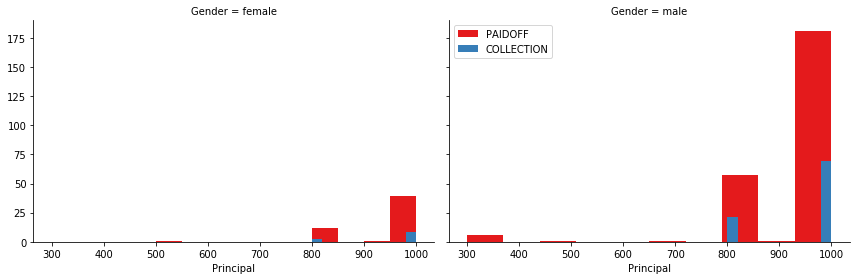

In [23]:
plt.Figure(figsize=(12,6), dpi=1000)
a = sns.FacetGrid(data=loan_df,col='Gender',hue='loan_status',palette='Set1', height=4,aspect=1.5, margin_titles=True)
a.map(plt.hist,'Principal')
plt.legend()


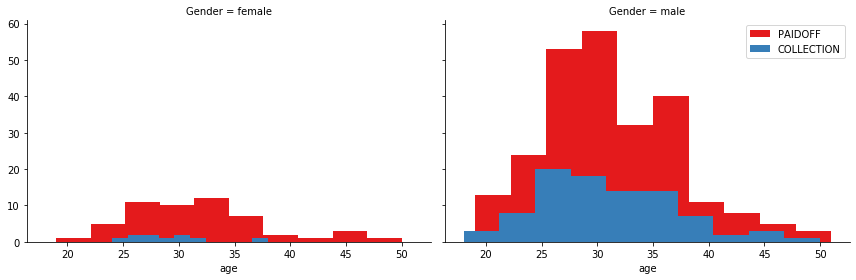

In [102]:
plt.Figure(figsize=(12,6), dpi=1000)
a = sns.FacetGrid(data=loan_df,col='Gender',hue='loan_status',
                  palette='Set1', height=4,aspect=1.5, margin_titles=True)
a.map(plt.hist,'age')
plt.legend()

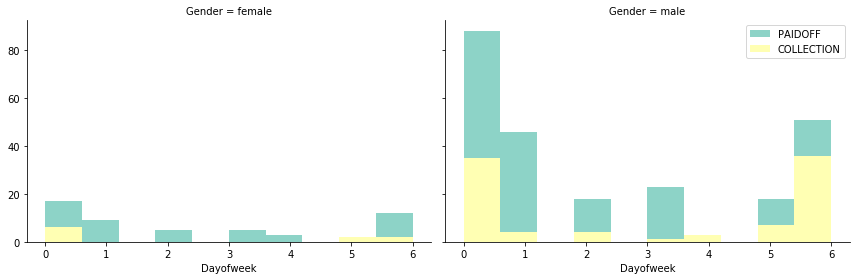

In [103]:
plt.Figure(figsize=(12,6), dpi=1000)
a = sns.FacetGrid(data=loan_df,col='Gender',hue='loan_status',
                  palette='Set3', height=4,aspect=1.5, margin_titles=True)
a.map(plt.hist,'Dayofweek')
plt.legend()

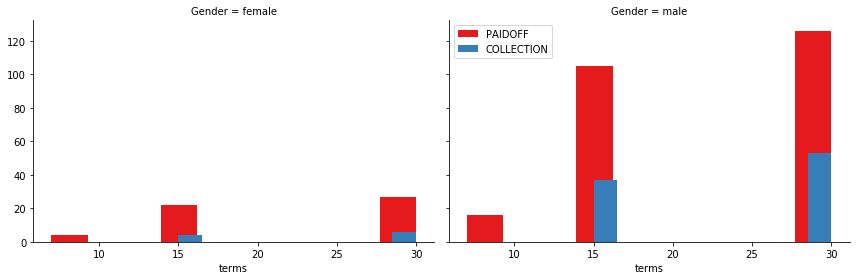

In [104]:
plt.Figure(figsize=(12,6), dpi=1000)
a = sns.FacetGrid(data=loan_df,col='Gender',hue='loan_status',palette='Set1', height=4,aspect=1.5, margin_titles=True)
a.map(plt.hist,'terms')
plt.legend()

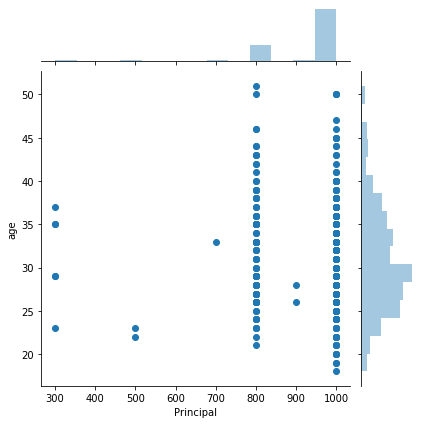

In [105]:
sns.jointplot(y = 'age',x = 'Principal',data = loan_df,kind='scatter')

/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binn

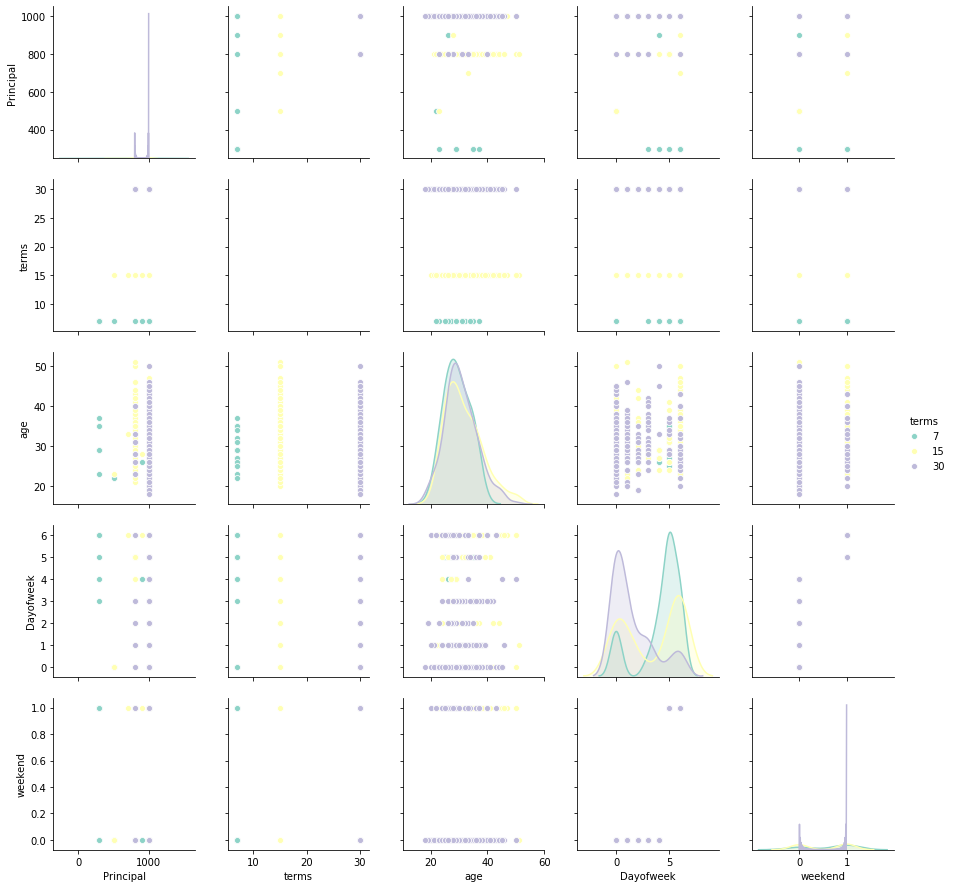

In [106]:
sns.pairplot(loan_df,hue='terms',palette='Set3')


## Conversion of Categorical Categories into Numericals

In [107]:
loan_df1 = pd.get_dummies(loan_df['education'],drop_first = False)
loan_df1.head()

,Bechalor,High School or Below,Master or Above,college
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0


In [108]:
loan_df2 = pd.get_dummies(loan_df['Gender'],drop_first=True)
loan_df2.head()

,male
0,0
1,1
2,0
3,1
4,1


In [109]:
loan_df3 = pd.concat([loan_df1, loan_df2],axis=1)
#loan_df3 = loan_df.drop(['education'], axis=1)
loan_df3

,Bechalor,High School or Below,Master or Above,college,male
0,1,0,0,0,0
1,0,0,1,0,1
2,0,1,0,0,0
3,0,0,0,1,1
4,1,0,0,0,1
...,...,...,...,...,...
341,0,1,0,0,1
342,0,1,0,0,1
343,0,0,0,1,1
344,0,0,0,1,1


In [110]:
loan_df4 = loan_df.drop(['Gender','education'],axis=1)

In [111]:
loan_df4.head()

,loan_status,Principal,terms,age,Dayofweek,weekend
0,PAIDOFF,1000,30,50,4,0
1,PAIDOFF,300,7,35,3,0
2,PAIDOFF,1000,30,43,6,1
3,PAIDOFF,1000,30,26,6,1
4,PAIDOFF,800,15,29,6,1


In [112]:
loan_df5 = pd.concat([loan_df3, loan_df4], axis=1)
loan_df5.head()

,Bechalor,High School or Below,Master or Above,college,male,loan_status,Principal,terms,age,Dayofweek,weekend
0,1,0,0,0,0,PAIDOFF,1000,30,50,4,0
1,0,0,1,0,1,PAIDOFF,300,7,35,3,0
2,0,1,0,0,0,PAIDOFF,1000,30,43,6,1
3,0,0,0,1,1,PAIDOFF,1000,30,26,6,1
4,1,0,0,0,1,PAIDOFF,800,15,29,6,1


(15, 50)

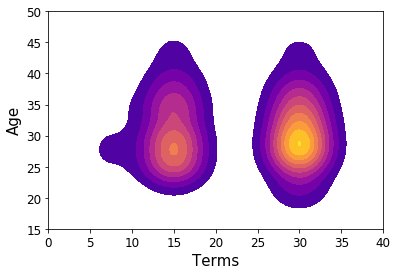

In [113]:
sns.kdeplot( loan_df5['terms'], loan_df5['age'],
                 cmap="plasma", shade=True, shade_lowest=False)
plt.xlabel("Terms", fontsize=15)
plt.ylabel("Age", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,40)
plt.ylim(15,50)


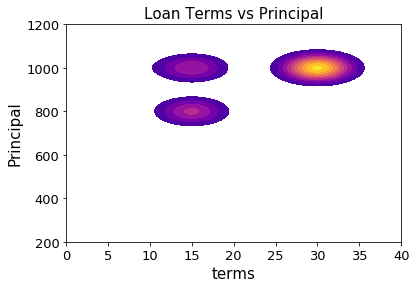

In [114]:
plt.xlabel('Terms', fontsize=15)
plt.ylabel('Principle', fontsize=15)
plt.xticks(fontsize=13)
plt.xlim([0,40])
plt.ylim(200,1200)
plt.yticks(fontsize=13)
plt.title("Loan Terms vs Principal", fontsize=15)
sns.kdeplot(loan_df5['terms'],loan_df5['Principal'],cmap="plasma", shade=True, shade_lowest=False)


## Importing selected Machine Learning Algorithms

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [116]:
from sklearn.model_selection import train_test_split


In [117]:
X = loan_df5.drop(['loan_status'], axis =1)
y = loan_df5['loan_status']


In [118]:
X_train = StandardScaler().fit(X).transform(X)
y_train = loan_df5['loan_status']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [120]:
print(X_train.shape)
print(y_train.shape)

(280, 10)
(280,)


## 1. Logistic Regression Model

In [121]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
predictions_log = logmodel.predict(X_test)

In [123]:
from sklearn.metrics import classification_report,confusion_matrix,jaccard_score,accuracy_score,f1_score,precision_score,recall_score

In [124]:
ps_log= precision_score(y_test,predictions_log,average='weighted').round(2)
rs_log=recall_score(y_test,predictions_log,average='weighted').round(2)
js_log=jaccard_score(y_test,predictions_log,average='weighted').round(2)
f1s_log=f1_score(y_test,predictions_log,average='weighted').round(2)
cr_log = classification_report(y_test, predictions_log)
#index=['COLLECTION','PAIDOFF']
#cr_log_df = pd.DataFrame(data=cr_log,columns= ['Precision','Recall','F1','Support'], index=index)
#cr_log_df.to_excel('cr_log_df.xls')
cm_log = confusion_matrix(y_test,predictions_log)
print("Classification Report Using Log Model for the Dataset is:",'\n\n', cr_log)
print("Confusion Matrix Using Log Model for the Dataset is:",'\n\n',cm_log)

Classification Report Using Log Model for the Dataset is: 

               precision    recall  f1-score   support

  COLLECTION       0.33      0.04      0.07        27
     PAIDOFF       0.78      0.98      0.87        93

    accuracy                           0.77       120
   macro avg       0.56      0.51      0.47       120
weighted avg       0.68      0.77      0.69       120

Confusion Matrix Using Log Model for the Dataset is: 

 [[ 1 26]
 [ 2 91]]


## 2. K-Nearest_Neighbors

In [125]:
X_knn = StandardScaler().fit(X).transform(X)
y_knn = loan_df5['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=101)


In [126]:
knn = KNeighborsClassifier(n_neighbors=1)


In [127]:
knn.fit(X_knn, y_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [128]:
prediction_knn = knn.predict(X_test)

In [129]:
print("Confusion matrix report for KNN matrix with 1 neighbor is:","\n\n", confusion_matrix(y_test, prediction_knn))

Confusion matrix report for KNN matrix with 1 neighbor is: 

 [[17 10]
 [ 1 92]]


In [130]:
print("Classification report for KNN matrix with 1 neighbor is:","\n\n", classification_report(y_test, prediction_knn))

Classification report for KNN matrix with 1 neighbor is: 

               precision    recall  f1-score   support

  COLLECTION       0.94      0.63      0.76        27
     PAIDOFF       0.90      0.99      0.94        93

    accuracy                           0.91       120
   macro avg       0.92      0.81      0.85       120
weighted avg       0.91      0.91      0.90       120



## Optimizing the K-value to see if scores can be improved 

In [131]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_knn, y_knn)
    prediction_i = knn.predict(X_knn)
    error_rate.append (np.mean(prediction_i != y_knn))

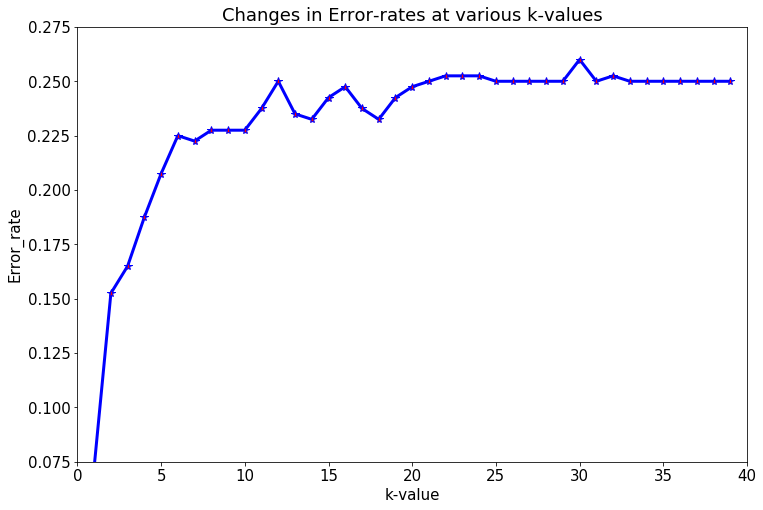

In [132]:
plt.figure(figsize = (12,8))
plt.xlabel("k-value",fontsize=15)
plt.ylabel("Error_rate", fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([0,40])
plt.ylim(0.075,0.275)
plt.yticks(fontsize=15)
plt.title("Changes in Error-rates at various k-values", fontsize=18)
plt.plot (range(1,40), error_rate,color='blue', linestyle='-',linewidth=3, marker='*',
         markerfacecolor='red', markersize=8)

### Since the k-value of 1 is optimal, we will retain the profile and compute scores based on k=1

In [133]:
ps_knn= precision_score(y_test,prediction_knn,average='weighted').round(2)
rs_knn=recall_score(y_test,prediction_knn,average='weighted').round(2)
js_knn=jaccard_score(y_test,prediction_knn,average='weighted').round(2)
f1s_knn=f1_score(y_test,prediction_knn,average='weighted').round(2)
cr_knn = classification_report(y_test, prediction_knn)
#index=['COLLECTION','PAIDOFF']
#cr_log_df = pd.DataFrame(data=cr_log,columns= ['Precision','Recall','F1','Support'], index=index)
#cr_log_df.to_excel('cr_log_df.xls')
cm_knn = confusion_matrix(y_test,prediction_knn)

In [134]:
print(cr_knn)

              precision    recall  f1-score   support

  COLLECTION       0.94      0.63      0.76        27
     PAIDOFF       0.90      0.99      0.94        93

    accuracy                           0.91       120
   macro avg       0.92      0.81      0.85       120
weighted avg       0.91      0.91      0.90       120



## 3. Decision Tree Model

In [135]:
dtree = DecisionTreeClassifier()

In [136]:
X = StandardScaler().fit(X).transform(X)
y = loan_df5['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [137]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [138]:
prediction_tree = dtree.predict(X_test)

In [139]:
print("Confusion matrix report for Decision Tree Model for this Dataset is:","\n\n", 
      confusion_matrix(y_test, prediction_tree))

Confusion matrix report for Decision Tree Model for this Dataset is: 

 [[13 14]
 [25 68]]


In [140]:
print("Classification report for Decision Tree is:","\n\n", 
      classification_report(y_test, prediction_tree))

Classification report for Decision Tree is: 

               precision    recall  f1-score   support

  COLLECTION       0.34      0.48      0.40        27
     PAIDOFF       0.83      0.73      0.78        93

    accuracy                           0.68       120
   macro avg       0.59      0.61      0.59       120
weighted avg       0.72      0.68      0.69       120



In [141]:
ps_tree= precision_score(y_test,prediction_tree,average='weighted').round(2)
rs_tree=recall_score(y_test,prediction_tree,average='weighted').round(2)
js_tree=jaccard_score(y_test,prediction_tree,average='weighted').round(2)
f1s_tree=f1_score(y_test,prediction_tree,average='weighted').round(2)
cr_tree = classification_report(y_test, prediction_tree)
#index=['COLLECTION','PAIDOFF']
#cr_log_df = pd.DataFrame(data=cr_log,columns= ['Precision','Recall','F1','Support'], index=index)
#cr_log_df.to_excel('cr_log_df.xls')
cm_tree = confusion_matrix(y_test,prediction_tree)

In [142]:
print(ps_tree,rs_tree,js_tree,f1s_tree)

0.72 0.68 0.55 0.69


In [143]:
!pip install mlxtend

In [144]:
#y_trnos = y_tree.astype(np.integer)
#y_tnnos = prediction_tree.astype(np.integer)

In [145]:
#from mlxtend.plotting import plot_decision_regions

#clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
#clf_tree.fit(X_train, y_train)
#X_combined = np.vstack((X_train, X_test))
#y_combined = np.hstack((y_trnos, y_tnnos))
#fig, ax = plt.subplots(figsize=(7, 7))
#plot_decision_regions(X_combined, y_combined, clf=clf_tree)
#plt.xlabel('petal length [cm]')
#plt.ylabel('petal width [cm]')
#plt.legend(loc='upper left')
#plt.tight_layout()
#plt.show()

# 4. Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',n_estimators=10,verbose=3)

In [147]:
X = StandardScaler().fit(X).transform(X)
y = loan_df5['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [148]:
rfc.fit(X,y)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=3, warm_start=False)

In [149]:
prediction_rfc=rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [150]:
print(classification_report(y_test,prediction_rfc))

              precision    recall  f1-score   support

  COLLECTION       0.90      0.70      0.79        27
     PAIDOFF       0.92      0.98      0.95        93

    accuracy                           0.92       120
   macro avg       0.91      0.84      0.87       120
weighted avg       0.92      0.92      0.91       120



In [151]:
print(confusion_matrix(y_test, prediction_rfc))

[[19  8]
 [ 2 91]]


In [152]:
ps_rfc= precision_score(y_test,prediction_rfc,average='weighted').round(2)
rs_rfc=recall_score(y_test,prediction_rfc,average='weighted').round(2)
js_rfc=jaccard_score(y_test,prediction_rfc,average='weighted').round(2)
f1s_rfc=f1_score(y_test,prediction_rfc,average='weighted').round(2)
cr_rfc = classification_report(y_test, prediction_rfc)
#index=['COLLECTION','PAIDOFF']
#cr_log_df = pd.DataFrame(data=cr_log,columns= ['Precision','Recall','F1','Support'], index=index)
#cr_log_df.to_excel('cr_log_df.xls')
cm_rfc = confusion_matrix(y_test,prediction_rfc)

# 5. Support Vector Machine

In [154]:
svc_model.fit(X_train,y_train)

/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [155]:
predictions_svc = svc_model.predict(X_test)

In [156]:
print(confusion_matrix(y_test,predictions_svc))

[[ 0 27]
 [ 5 88]]


In [157]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        27
     PAIDOFF       0.77      0.95      0.85        93

    accuracy                           0.73       120
   macro avg       0.38      0.47      0.42       120
weighted avg       0.59      0.73      0.66       120



In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
/Users/ganeshnarayanan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [84]:
ps_svc= precision_score(y_test,predictions_svc,average='weighted').round(2)
rs_svc=recall_score(y_test,predictions_svc,average='weighted').round(2)
js_svc=jaccard_score(y_test,predictions_svc,average='weighted').round(2)
f1s_svc=f1_score(y_test,predictions_svc,average='weighted').round(2)
cr_svc = classification_report(y_test, predictions_svc)
#index=['COLLECTION','PAIDOFF']
#cr_log_df = pd.DataFrame(data=cr_log,columns= ['Precision','Recall','F1','Support'], index=index)
#cr_log_df.to_excel('cr_log_df.xls')
cm_svc = confusion_matrix(y_test,predictions_svc)

# 6. Naive Bayes Classifier Algorithm

In [176]:
Bayes_model = GaussianNB(priors=None, var_smoothing=1e-09)

In [177]:
Bayes_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
predictions_Bayes= Bayes_model.predict(X_test)

In [179]:
print(confusion_matrix(y_test,predictions_Bayes))

[[ 6 21]
 [ 8 85]]


In [180]:
print(classification_report(y_test,predictions_Bayes))

              precision    recall  f1-score   support

  COLLECTION       0.43      0.22      0.29        27
     PAIDOFF       0.80      0.91      0.85        93

    accuracy                           0.76       120
   macro avg       0.62      0.57      0.57       120
weighted avg       0.72      0.76      0.73       120



In [181]:
ps_Bayes= precision_score(y_test,predictions_Bayes,average='weighted').round(2)
rs_Bayes =recall_score(y_test,predictions_Bayes,average='weighted').round(2)
js_Bayes =jaccard_score(y_test,predictions_Bayes,average='weighted').round(2)
f1s_Bayes=f1_score(y_test,predictions_Bayes,average='weighted').round(2)
cr_Bayes = classification_report(y_test, predictions_Bayes)
#index=['COLLECTION','PAIDOFF']
#cr_log_df = pd.DataFrame(data=cr_log,columns= ['Precision','Recall','F1','Support'], index=index)
#cr_log_df.to_excel('cr_log_df.xls')
cm_Bayes = confusion_matrix(y_test,predictions_Bayes)

#       Summary

In [163]:
summary_ps = {'Precision Score':[ps_log,ps_knn,ps_tree,ps_rfc,ps_svc,ps_Bayes]}

In [165]:
summary_rs = {'Recall Score':[rs_log,rs_knn,rs_tree,rs_rfc,rs_svc,rs_Bayes]}

In [166]:
summary_js = {'Jaccard Score':[js_log,js_knn,js_tree,js_rfc,js_svc,js_Bayes]}

In [182]:
summary_f1s = {'F1s':[f1s_log,f1s_knn,f1s_tree,f1s_rfc,f1s_svc,f1s_Bayes]}

In [183]:
summary_scores = {'Precision Score':[ps_log,ps_knn,ps_tree,ps_rfc,ps_svc,ps_Bayes],'Recall Score':[rs_log,rs_knn,rs_tree,rs_rfc,rs_svc,rs_Bayes],
                 'Jaccard Score':[js_log,js_knn,js_tree,js_rfc,js_svc,js_Bayes],'F1s':[f1s_log,f1s_knn,f1s_tree,f1s_rfc,f1s_svc,f1s_Bayes]}

In [193]:
index=['Logistic_Regression','knn','Decision_Tree','Random_Classifier','Support_Vector_Machine','Naive Bayesian']
Data_Metric_Report = pd.DataFrame(summary_scores,index=index)

In [186]:
Data_Metric_Report.to_csv('Data_Metric_Report.csv')

# Data Visualization of Metric Scores

In [194]:
Data_Metric_Report.head()

,Precision Score,Recall Score,Jaccard Score,F1s
Logistic_Regression,0.68,0.77,0.60,0.69
knn,0.91,0.91,0.83,0.90
Decision_Tree,0.72,0.68,0.55,0.69
Random_Classifier,0.92,0.92,0.85,0.91
Support_Vector_Machine,0.59,0.73,0.57,0.66


In [229]:
!pip install dataframe_image



     |████████████████████████████████| 645kB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 133kB 193kB/s eta 0:00:01
     |████████████████████████████████| 51kB 158kB/s eta 0:00:011


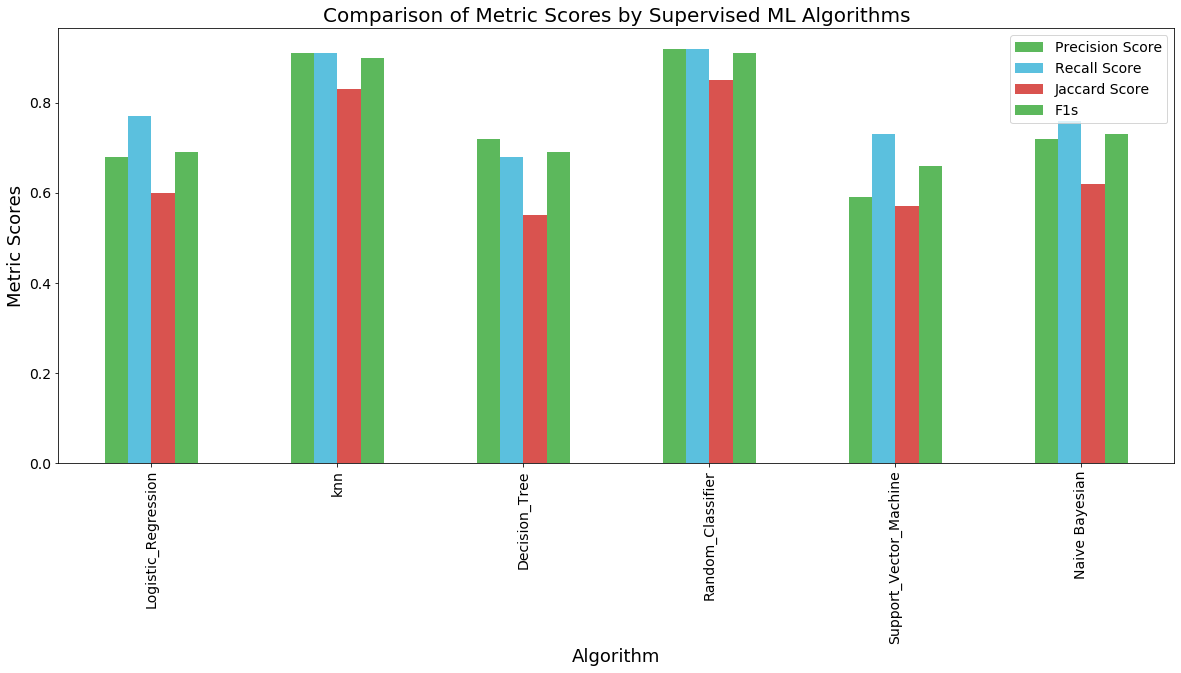

In [233]:
Data_Metric_Report_1 = Data_Metric_Report.plot(kind='bar', 
               figsize=(20, 8),
               color = ['#5cb85c','#5bc0de','#d9534f'],
               linewidth =1,fontsize=14)
Data_Metric_Report_1.set_title('Comparison of Metric Scores by Supervised ML Algorithms',
               fontsize=20)

Data_Metric_Report_1.set_facecolor('white')

Data_Metric_Report_1.legend(fontsize=14,facecolor = 'white',loc='best') 

Data_Metric_Report_1.get_yaxis().set_visible(True)
Data_Metric_Report_1.set_ylabel('Metric Scores', fontsize=18)
Data_Metric_Report_1.set_xlabel('Algorithm', fontsize=18)
plt.show()
#Data_Metric_Report_1.savefig('path/to/Figure-X:Metric Scores Obtained From Various ML Algorithms of Loan Datasets .jpeg')

# Conclusion